<a href="https://colab.research.google.com/github/ananddiv/datascience/blob/main/Employee_Turnover_Analysis_Anand_Divakaranv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Portobello Tech is an app innovator that has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details, including the number of projects they worked on, average monthly working hours, time spent in the company, promotions in the last 5 years, and salary level.
Data from prior evaluations show the employees’ satisfaction at the workplace. The data could be used to identify patterns in work style and their interest in continuing to work in the company.
The HR Department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over a certain time period.


As the ML Developer assigned to the HR Department, you have been asked to create ML Programs to
1.	Perform data quality checks by checking for missing values if any.
2.	Understand what factors contributed most to employee turnover by EDA.
3.	Perform clustering of Employees who left based on their satisfaction and evaluation.
4.	Handle the left Class Imbalance using the SMOTE technique.
5.	Perform k-fold cross-validation model training and evaluate performance.
6.	Identify the best model and justify the evaluation metrics used.
7.	Suggest various retention strategies for targeted employees.



**Feature Details**

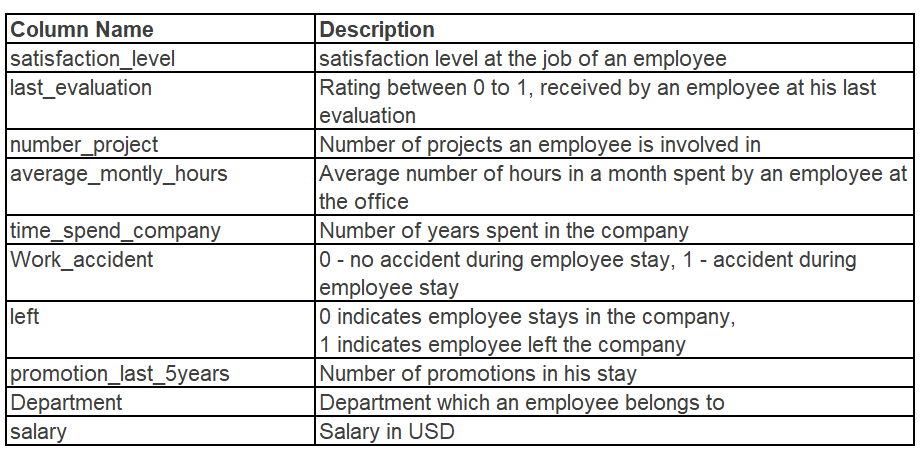

Import python packages

In [135]:
import pandas as pd
import numpy as np
import missingno as msno
from imblearn.over_sampling import SMOTE

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix

Import the data

In [124]:
df = pd.read_csv('1688640705_hr_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Check the shape of the data

In [7]:
df.shape

(14999, 10)

Check the properties of the data using describe

In [8]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Analyse more details of the data using info() method.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Observations: <br>
1. The dataset has 10 features <br>
2. The dataset has 14999 observations/datapoints <br>
3. The dataset does not have any null values<br>

1.	Perform data quality checks by checking for missing values, if any

<Axes: >

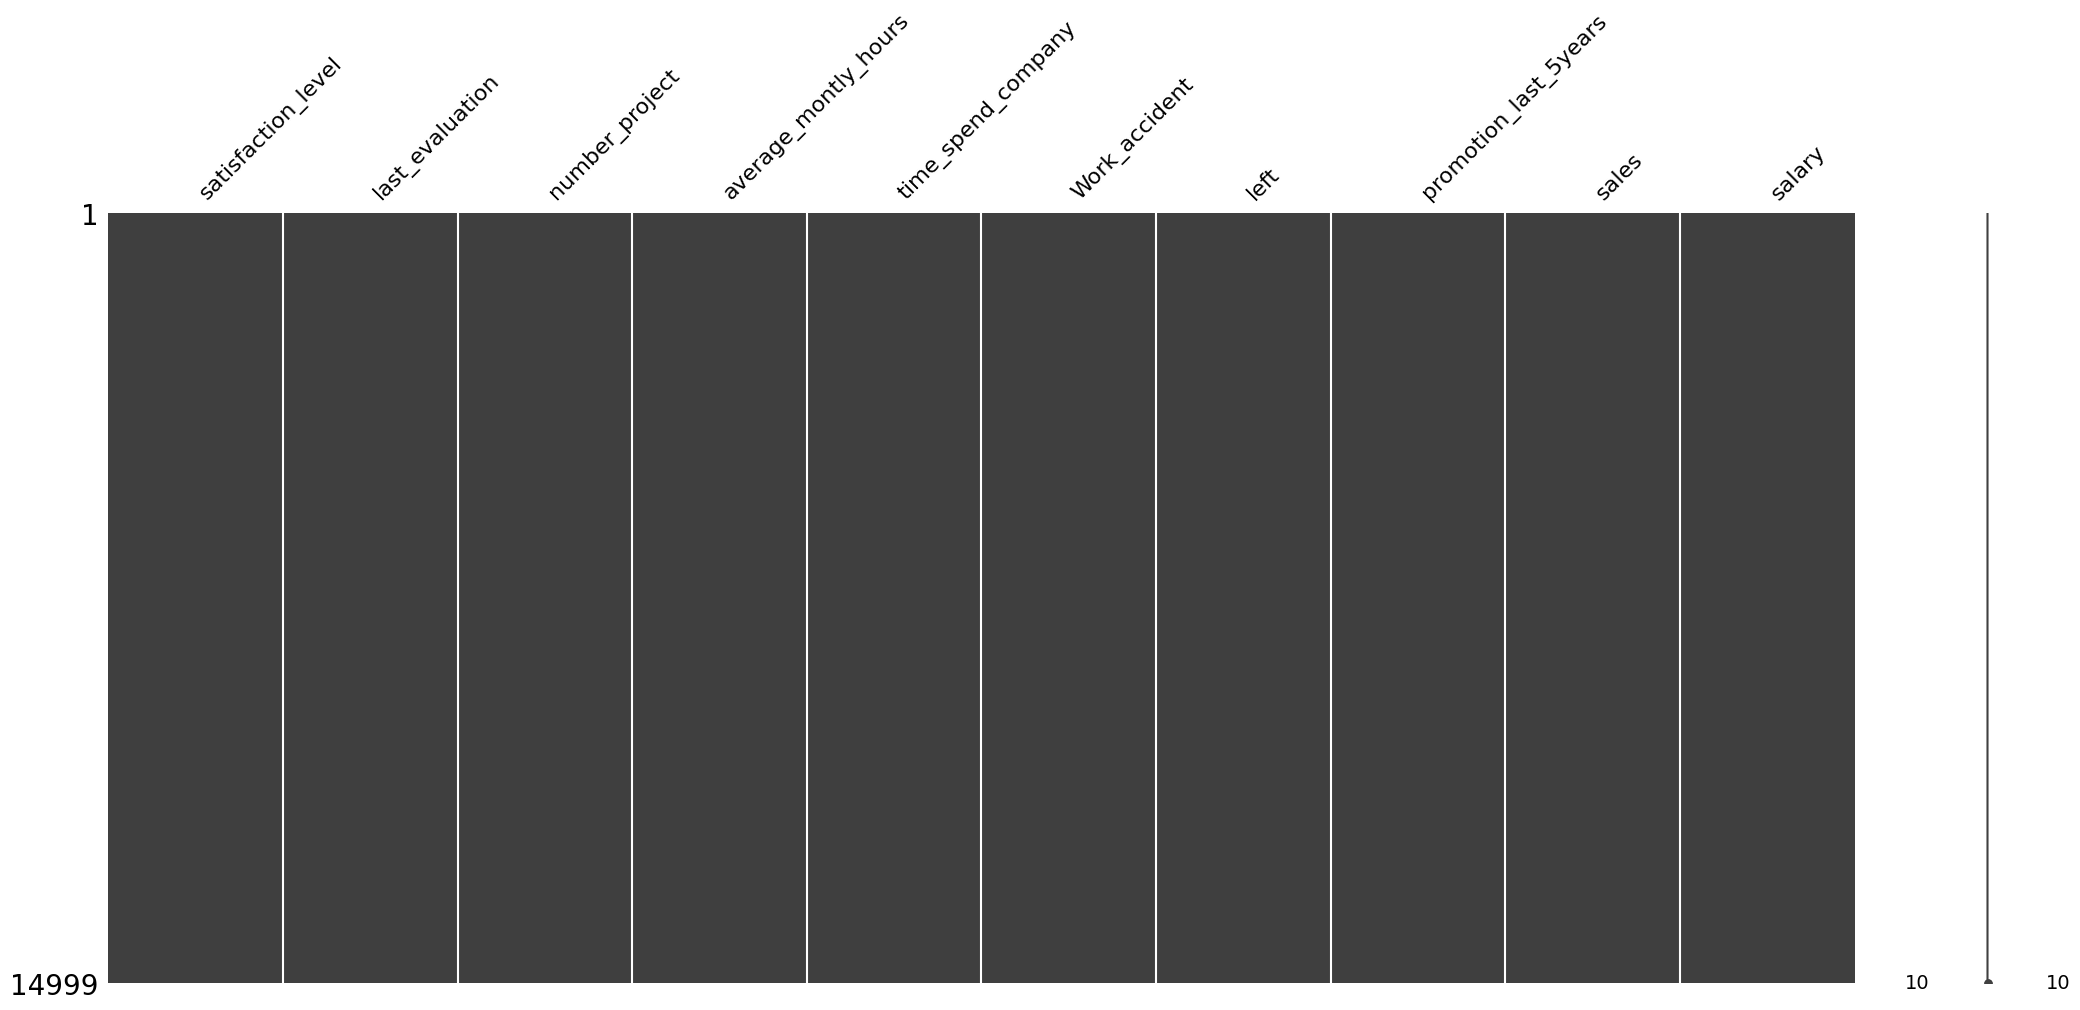

In [53]:
msno.matrix(df)

None of the features are missing any data

<Axes: >

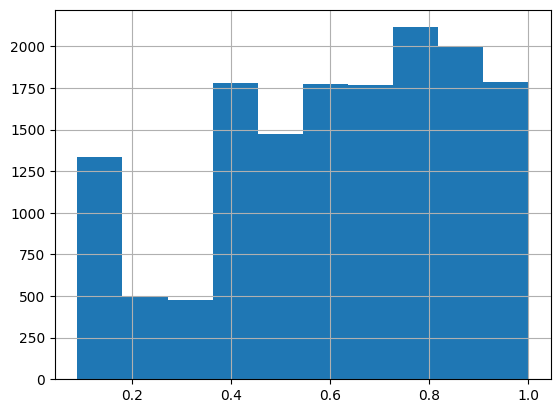

In [18]:
df['satisfaction_level'].hist(bins=10)

<Axes: >

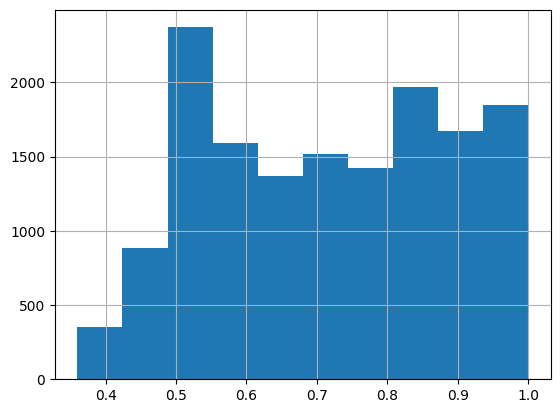

In [20]:
df['last_evaluation'].hist(bins=10)

In [21]:
df['number_project'].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

<Axes: >

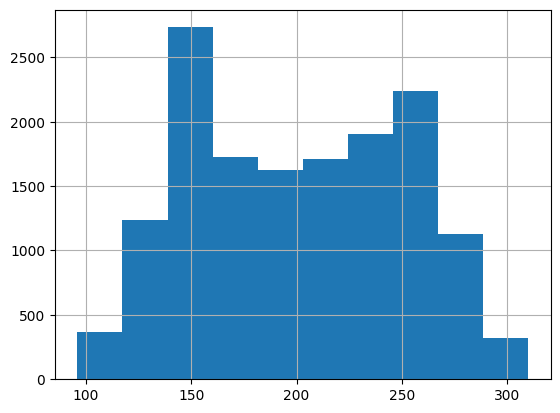

In [22]:
df['average_montly_hours'].hist(bins=10)

<Axes: >

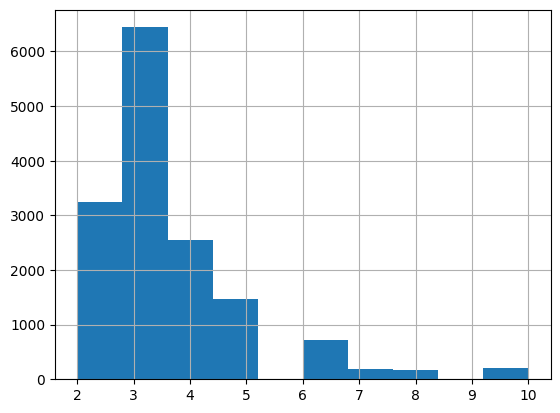

In [24]:
df['time_spend_company'].hist(bins=10)

In [27]:
df['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [29]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

Class imbalance found in left feature

In [30]:
df['promotion_last_5years'].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [31]:
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [34]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

Observations:
1. Missing data not found in the datset
2. Salary feature needs linear encoding to convert the data to numeric
3. Sales feature might need linear encoding to conver the data to numeric
3. Class imbalnce found in the feature 'left'

2.	Understand what factors contributed most to employee turnover by EDA

2.1 Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data

<ipython-input-65-6c01a6767760>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr()))
<ipython-input-65-6c01a6767760>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, mask=mask)


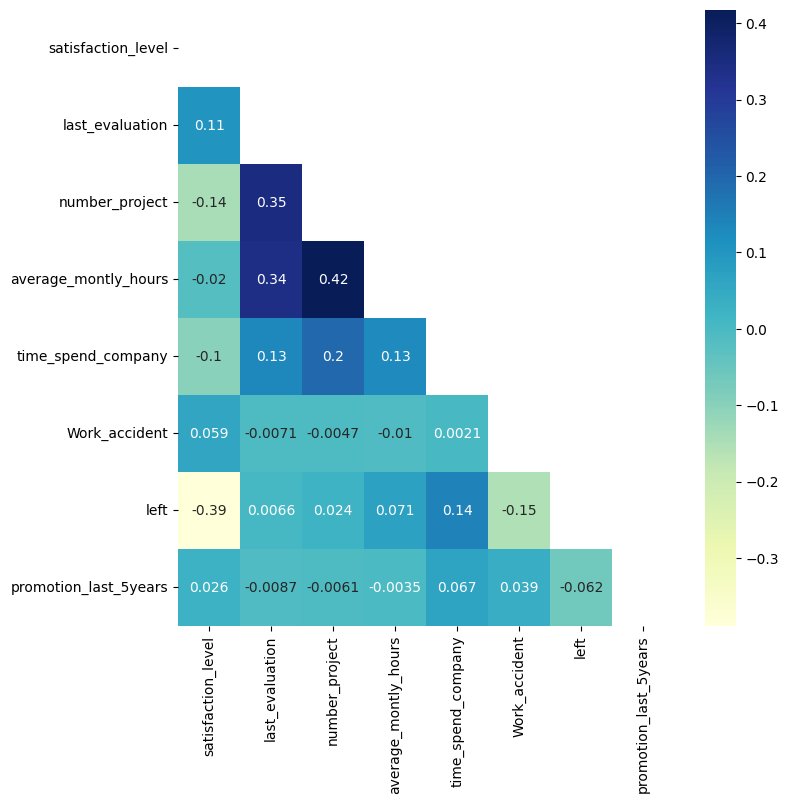

In [65]:
fig, ax = plt.subplots(figsize=(8,8))

# creating a mask
mask = np.triu(np.ones_like(df.corr()))

# plotting a triangle correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, mask=mask)

# displaying heatmap
plt.show()

There is a negative co-relation between the staisfactoin level of the employee and the left feature. <br>
The employess who are more satisfied stays with the organization.

2.2 Draw distrubution plots

2.2.1 Employee Satisfaction (use column satisfaction_level)

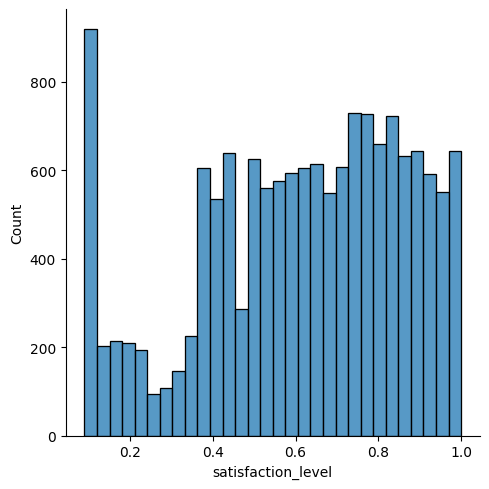

In [36]:
sns.displot(df['satisfaction_level'])

2.2.2 Employee Evaluation (use column last_evaluation)

<Axes: >

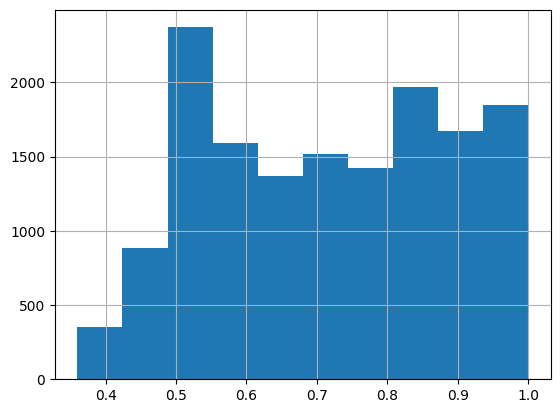

In [39]:
df['last_evaluation'].hist(bins=10)

2.2.3 Employee Average Monthly Hours (use column average_montly_hours)

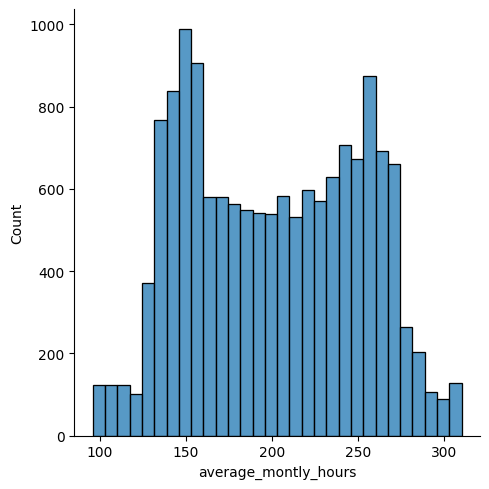

In [41]:
sns.displot(df['average_montly_hours'])

2.3 Draw the bar plot of the Employee Project Count of both employees who left and stayed in the organization (use column number_project and hue column left), and give your inferences from the plot

<Axes: xlabel='number_project', ylabel='Count'>

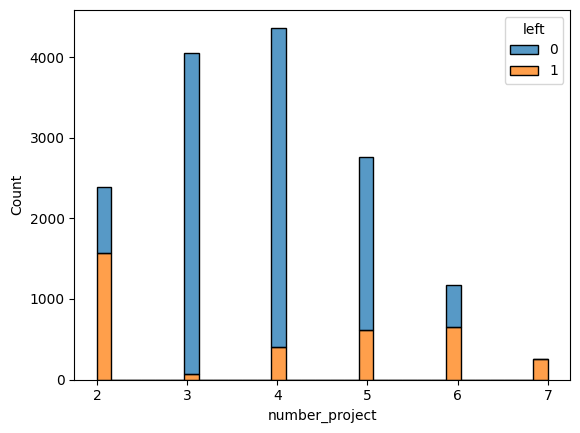

In [59]:
sns.histplot(data=df,x='number_project',hue='left',multiple='stack')

3. Perform clustering of employees who left based on their satisfaction and evaluation <br>

3.1 Choose columns satisfaction_level, last_evaluation and left

First identify the employees who left the company

In [106]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

3571 observations exists for employess who left the company

In [107]:
df_left = df[df['left'] == 1]

Select the three features columns satisfaction_level, last_evaluation and left

In [127]:
X=df_left[['satisfaction_level','last_evaluation','left']]
X.head()

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1


In [128]:
X.shape

(3571, 3)

Identify the optimal number of clusters in the dataset

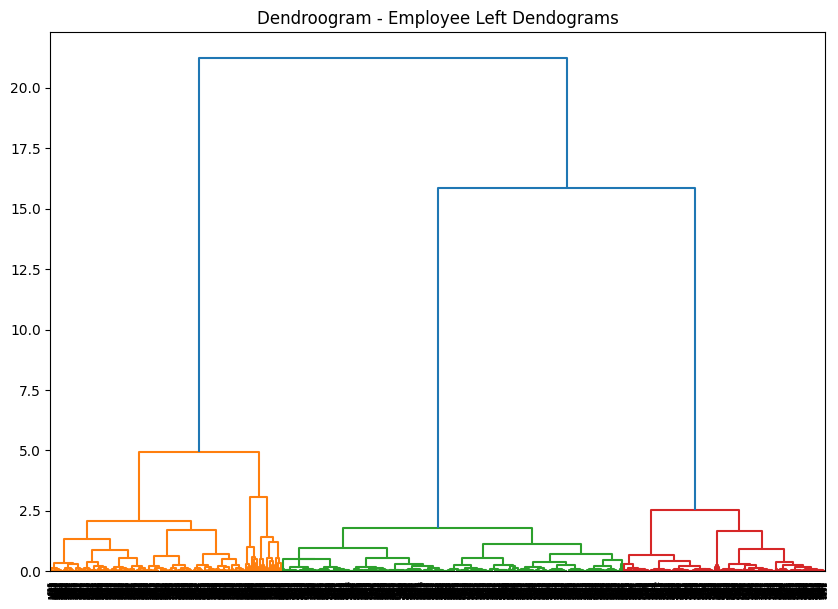

In [132]:
plt.figure(figsize=(10, 7))
plt.title("Dendroogram - Employee Left Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

3.2.	Do K-Means clustering of employees who left the company into 3 clusters?

K-means is based on eulidian distance and hence we need to perform a standard scale on the dataset to have a mean of 0 and standard deviation of 1

In [93]:
st = StandardScaler()
X_scaled = st.fit_transform(X)

In [94]:
X_scaled.shape

(3571, 3)

In [95]:
model = KMeans(n_clusters=3, n_init= 200, random_state= 42,init='k-means++')
kmc_clusters = model.fit_predict(X_scaled)

In [96]:
X['cluster'] = kmc_clusters

<ipython-input-96-ddf1852def89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmc_clusters


In [97]:
X.head()

,satisfaction_level,last_evaluation,left,cluster
0,0.38,0.53,1,0
1,0.80,0.86,1,1
2,0.11,0.88,1,2
3,0.72,0.87,1,1
4,0.37,0.52,1,0


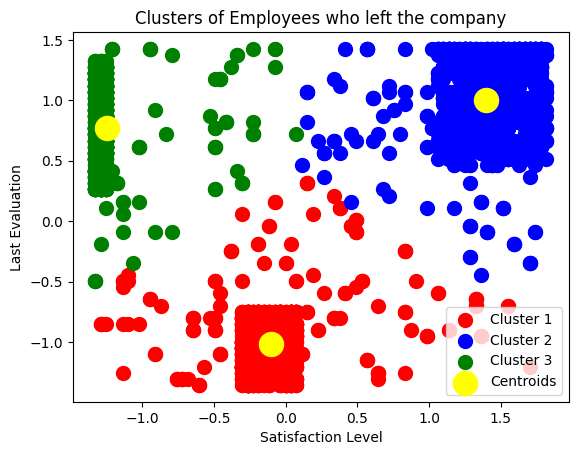

In [104]:
plt.scatter(X_scaled[kmc_clusters == 0, 0], X_scaled[kmc_clusters == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_scaled[kmc_clusters == 1, 0], X_scaled[kmc_clusters == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_scaled[kmc_clusters == 2, 0], X_scaled[kmc_clusters == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Employees who left the company')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend()
plt.show()

3.3.	Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters

3.3.0 Cluster-1 denotes the set of employess who received a least to moderate evaluation but were also had a varying satisfaction level<br>
3.3.1 Cluster-2 denotes the set of employess who received a great evalaution and were highly satisfied.<br>
3.3.2 Cluster-3 denotes the set of employess who received a great evaluation but were least satisfied.<br>


4.	Handle the left Class Imbalance using the SMOTE technique

4.1.	Pre-process the data by converting categorical columns to numerical columns by <br>
■	Separating categorical variables and numeric variables.<br>
■	Applying get_dummies() to the categorical variables.<br>
■	Combining categorical variables and numeric variables.


In [113]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

We see an imbalance on the left class. We can use SMOTE to oversample the data to balance this category of data.[link text](https://)

In [117]:
df_dummy = pd.get_dummies(df[['sales','salary']],drop_first=True)

In [125]:
df_new = pd.concat([df.drop(['sales','salary'],axis=1),df_dummy], axis=1)
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [140]:
X=df_new.drop('left',axis=1)
y=df_new['left']

Scale the data as the SMOTE will use Kn algorithm which uses Euclidian distance for manipulation.

In [141]:
st = StandardScaler()
X_scaled = st.fit_transform(X)

4.2.	Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123

In [150]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=.20,random_state=123)

In [151]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((11999, 18), (11999,), (3000, 18), (3000,))

4.3.	Upsample the train dataset using the SMOTE technique from the imblearn module

In [152]:
oversample=SMOTE(random_state=42)
X_transformed,y_transformed = oversample.fit_resample(X_train,y_train)

In [155]:
y_transformed.value_counts()


0    9137
1    9137
Name: left, dtype: int64

Now the data is balanced

5.	Perform 5-fold cross-validation model training and evaluate performance<br>

5.1.	Train a Logistic Regression model, apply a 5-fold CV, and plot the classification report

5.2.	Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report

5.3.	Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report

6.	Identify the best model and justify the evaluation metrics used

6.1.	Find the ROC/AUC for each model and plot the ROC curve

6.2.	Find the confusion matrix for each of the models

6.3.	Explain which metric needs to be used from the confusion matrix - Recall or Precision?

7.	Suggest various retention strategies for targeted employees

7.1.	Using the best model, predict the probability of employee turnover in the test data

7.2.	Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone<br>
■	Safe Zone (Green) (Score < 20%)<br>
■	Low Risk Zone (Yellow) (20% < Score < 60%)<br>
■	Medium Risk Zone (Orange) (60% < Score < 90%)<br>
■	High Risk Zone (Red) (Score > 90%).<br>
